# Introduction

Build a recommender system to identify top 5 recommended products for a user

## High Level Steps to be followed

| **Step** | **Notebook** |
|---|---|
| Data Acquisition | Implemented in Prior Notebook SBPRS_01_EDA_and_Recommendation |
| Data Cleansing | Implemented in Prior Notebook SBPRS_01_EDA_and_Recommendation |
| Basic EDA to understand the dataset | Implemented in Prior Notebook SBPRS_01_EDA_and_Recommendation |
| Preprocessing if any | Implemented in Prior Notebook SBPRS_01_EDA_and_Recommendation |
| Identify suitable Recommendation System | Implemented in Prior Notebook SBPRS_01_EDA_and_Recommendation |
| **Identify suitable Classifier to predict sentiment** | **Current Scope of Notebook (SBPRS_02_Sentiment_Classifier)** |
| Identify top 20 Recommended Product for each user based on similarity score | Implemented in next Notebook ( SBPRS_03_Consolidation ) |
| For each review , Calculate Percentage of Postive Sentiment | Implemented in next Notebook ( SBPRS_03_Consolidation ) |
| Pick 5 Products which has top Recommendation Percentage |Implemented in next Notebook ( SBPRS_03_Consolidation )  |




NOTE : This notebook is executed on Colab Environment because of my current desktop processing limitations

**Upload the cleansed_dataset.pkl generated on previous step to /content folder in Colab**

## Data Acquisition

### Importing necessary libraries

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np

import os

In [ ]:
## pandas display option changes
pd.set_option('display.max_rows', 500)

In [ ]:
# Load from file
!pip3 install pickle5
import pickle5 as pickle


     |████████████████████████████████| 256 kB 2.6 MB/s 


In [ ]:

pkl_filename="/content/cleansed_dataset.pkl"

with open(pkl_filename, 'rb') as file:
    cleansed_dataset = pickle.load(file)

# Building the sentiment Classifier

Reviewing the cleaned dataset for Sentiment Classifier

In [ ]:
cleansed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 29937 non-null  object
 1   name               29937 non-null  object
 2   reviews_username   29937 non-null  object
 3   reviews_text       29937 non-null  object
 4   reviews_title      29748 non-null  object
 5   updated_sentiment  29936 non-null  object
 6   reviews_rating     29937 non-null  int64 
 7   normalised_rating  29937 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


In [ ]:
cleansed_dataset.shape

(29937, 8)

In [ ]:
 cleansed_dataset["combined_title_text"]= cleansed_dataset.reviews_title.fillna('')  + " . " + cleansed_dataset.reviews_text.fillna('')

In [ ]:
cleansed_dataset.head(3)

,id,name,reviews_username,reviews_text,reviews_title,updated_sentiment,reviews_rating,normalised_rating,combined_title_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,i love this album. it's very good. more to the...,Just Awesome,Positive,5,5,Just Awesome . i love this album. it's very go...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor. This review was collected as part...,Good,Positive,5,5,Good . Good flavor. This review was collected ...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor.,Good,Positive,5,5,Good . Good flavor.


## EDA for Textual Analysis

In [ ]:
cleansed_dataset.combined_title_text.str.split(" ").str.len()

0         44
1         13
2          4
3        126
4         27
        ... 
29995     49
29996     26
29997     55
29998     69
29999     53
Name: combined_title_text, Length: 29937, dtype: int64

In [ ]:
cleansed_dataset.combined_title_text[1]

'Good . Good flavor. This review was collected as part of a promotion.'

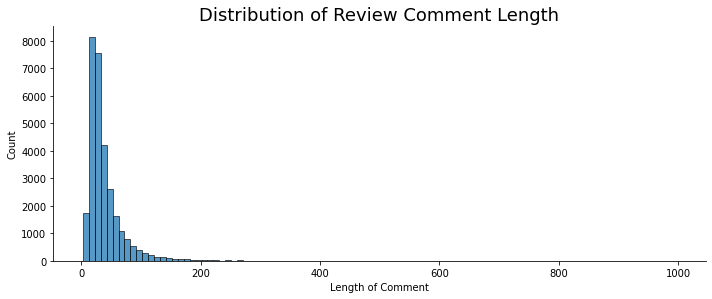

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.displot(cleansed_dataset.combined_title_text.str.split(" ").str.len() , bins=100, height = 4, aspect= 10/4 )

plt.xlabel("Length of Comment")
plt.title("Distribution of Review Comment Length", size=18)
plt.show()


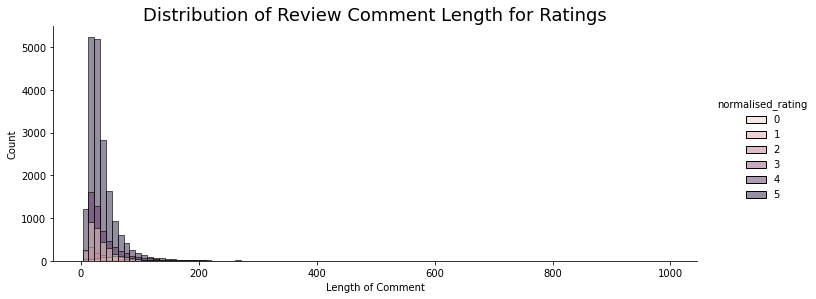

In [ ]:
sns.set_palette("Paired")

cleansed_dataset["len_review"]= cleansed_dataset.combined_title_text.str.split(" ").str.len()
ax = sns.displot(data=cleansed_dataset, x="len_review", hue="normalised_rating" , bins=100, height = 4, aspect= 10/4 )

plt.xlabel("Length of Comment")
plt.title("Distribution of Review Comment Length for Ratings", size=18)
plt.show()


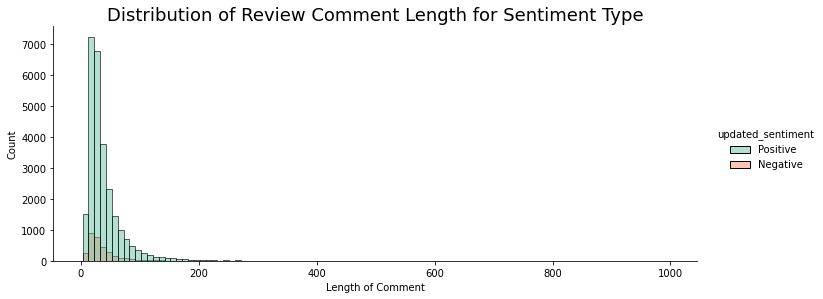

In [ ]:
sns.set_palette("Set2")


cleansed_dataset["len_review"]= cleansed_dataset.combined_title_text.str.split(" ").str.len()
ax = sns.displot(data=cleansed_dataset, x="len_review", hue="updated_sentiment" , bins=100, height = 4, aspect= 10/4 )

plt.xlabel("Length of Comment")
plt.title("Distribution of Review Comment Length for Sentiment Type", size=18)
plt.show()

In [ ]:
wc=[line_text.split(' ')[1] for line_text in cleansed_dataset.combined_title_text if len(line_text.split(' ')[1])>0]


In [ ]:
wc=[a for a in wc if len(a)>0]
wc = " ".join(wc)

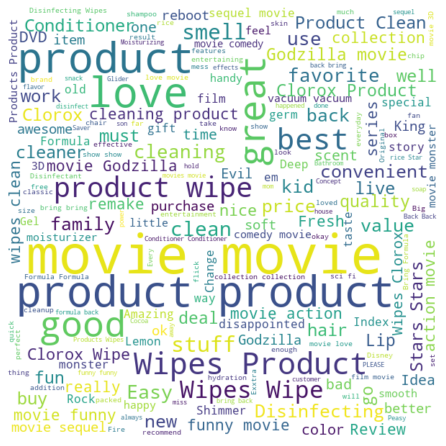

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=600,background_color="white").generate(wc)
#Display the generated image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Observation
* Count of Positive Reviews are more than Count of Negative Reviews


In [ ]:


wc_pos=[line_text.split(' ')[1] for line_text in cleansed_dataset[cleansed_dataset.updated_sentiment=="Positive"].combined_title_text if len(line_text.split(' ')[1])>0]

wc_pos=[a for a in wc_pos if len(a)>0]
wc_pos = " ".join(wc_pos)


In [ ]:

wc_neg=[line_text.split(' ')[1] for line_text in cleansed_dataset[cleansed_dataset.updated_sentiment=="Negative"].combined_title_text if len(line_text.split(' ')[1])>0]

wc_neg=[a for a in wc_neg if len(a)>0]
wc_neg = " ".join(wc_neg)

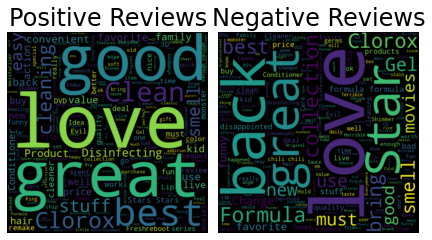

In [ ]:
#plt.figure(figsize=(6,6))

from wordcloud import WordCloud, STOPWORDS

# remove stopwords
stopwords = set(STOPWORDS)
wc_list=["movie", "Godzilla","product", "wipes"]
for wc in wc_list:
    stopwords.add(wc)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=600, height=600,background_color="black", stopwords=stopwords).generate(wc_pos)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=1)
plt.title('Positive Reviews', fontsize=24)

plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=600, height=600,background_color="black", stopwords=stopwords).generate(wc_neg)
#plt.figure(figsize=(6,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=1)
plt.title('Negative Reviews', fontsize=24)

plt.show()

## Preprocessing Review Text

Read the review text and perform the following to cleanup the review text

* Convert to lowercase
* Remove STOPWORDS
* Remove Punctuation Marks
* Remove URLs
* Remove HTML Tags [ NOT NEEDED ]
* Remove Email Tags ( RE: , FW: ) [ NOT NEEDED ] 
* Remove Non-Ascii Characters, Digits, Whitespace  [ NOT NEEDED ] 

In [ ]:
#import importlib
#importlib.reload(nltk)

import nltk
from nltk.tokenize import word_tokenize,TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stemmer = PorterStemmer()

url_regex = r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)'
num_regex = r'^\-?([0-9]{1,3}(,?[0-9]{1,3})*(\.[0-9]+)?|\.[0-9]+)$'
url = re.compile(url_regex)
num = re.compile(num_regex)

def preprocess_sentences(document):

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove punctuation
    words = [word for word in words if word not in string.punctuation]

    # remove URL & Numbers

    words = [word for word in words if url.match(word) == None]
    words = [word for word in words if num.match(word) == None]

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    words = [stemmer.stem(word) for word in words]
    
    # join words to make sentence
    document = " ".join(words)

    return document


In [ ]:
preprocess_sentences("THIS IS A DEMO TEXT 123456@#@$")

%timeit -r1 -n1 preprocess_sentences("THIS IS A DEMO TEXT 123456@#@$")

1 loop, best of 1: 1.92 ms per loop


In [ ]:
%timeit -r1 -n1 cleansed_dataset['cleaned_combined_title_text'] = cleansed_dataset['combined_title_text'].map(preprocess_sentences)

1 loop, best of 1: 3min 16s per loop


In [ ]:
cleansed_dataset

,id,name,reviews_username,reviews_text,reviews_title,updated_sentiment,reviews_rating,normalised_rating,combined_title_text,len_review,cleaned_combined_title_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,i love this album. it's very good. more to the...,Just Awesome,Positive,5,5,Just Awesome . i love this album. it's very go...,44,awesom love album 's good hip hop side current...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor. This review was collected as part...,Good,Positive,5,5,Good . Good flavor. This review was collected ...,13,good good flavor review collect part promot
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor.,Good,Positive,5,5,Good . Good flavor.,4,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,rebecca,I read through the reviews on here before look...,Disappointed,Negative,1,0,Disappointed . I read through the reviews on h...,126,disappoint read review look buy one coupl lubr...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,walker557,My husband bought this gel for us. The gel cau...,Irritation,Negative,1,0,Irritation . My husband bought this gel for us...,27,irrit husband bought gel us gel caus irrit fel...
...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,laurasnchz,I got this conditioner with Influenster to try...,Softness!!,Positive,5,5,Softness!! . I got this conditioner with Influ...,49,soft got condition influenst tri im love far o...
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,scarlepadilla,"I love it , I received this for review purpose...",I love it,Positive,5,5,"I love it . I love it , I received this for re...",26,love love receiv review purpos influenst leav ...
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,liviasuexo,First of all I love the smell of this product....,Hair is so smooth after use,Positive,5,5,Hair is so smooth after use . First of all I l...,55,hair smooth use first love smell product wash ...
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,ktreed95,I received this through Influenster and will n...,Perfect for my oily hair!,Positive,5,5,Perfect for my oily hair! . I received this th...,69,perfect oili hair receiv influenst never go ba...


In [ ]:
cleansed_dataset["updated_sentiment"]

0        Positive
1        Positive
2        Positive
3        Negative
4        Negative
           ...   
29995    Positive
29996    Positive
29997    Positive
29998    Positive
29999    Positive
Name: updated_sentiment, Length: 29937, dtype: object

In [ ]:
cleansed_dataset["updated_sentiment_int"] = cleansed_dataset["updated_sentiment"].map(lambda x : 0 if x=="Negative" else 1)

In [ ]:
# saving our cleaned dataset to pickle file
import pickle

filename = "cleansed_dataset_combined.pkl"
with open(filename, 'wb') as file:
    pickle.dump(cleansed_dataset, file)
    


In [ ]:
# loading from pickle file
#filename = "cleansed_dataset_combined.pkl"
#with open(filename, 'rb') as file:
#    cleansed_dataset = pickle.load(file)

## Creating TF-IDF Features

In [ ]:
# Modelling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
word_vectorizer = TfidfVectorizer(
    strip_accents = 'unicode',
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    tokenizer= word_tokenize,
    ngram_range = (1, 3),
    #stop_words = stopwords_list,
    sublinear_tf = True)

tfidf_data = word_vectorizer.fit_transform(cleansed_dataset['cleaned_combined_title_text'])

In [ ]:
tfidf_data

<29937x586917 sparse matrix of type '<class 'numpy.float64'>'
	with 1603892 stored elements in Compressed Sparse Row format>

In [ ]:
with open('vectorizer.pkl', 'wb') as fin:
  pickle.dump(tfidf_data, fin)

## Train/Test Split

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data, cleansed_dataset['updated_sentiment_int'], test_size = 0.3, random_state = 14)


In [ ]:
cleansed_dataset.shape

(29937, 12)

In [ ]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_train_tfidf.shape)
print(y_test_tfidf.shape)

(20955, 586917)
(8982, 586917)
(20955,)
(8982,)


In [ ]:
y_train_tfidf.value_counts()

1    18705
0     2250
Name: updated_sentiment_int, dtype: int64

In [ ]:
y_test_tfidf.value_counts()

1    8008
0     974
Name: updated_sentiment_int, dtype: int64

## Fixing Class Imbalance using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
sm = SMOTE()

# transform the dataset
X_train_tfidf_sm, y_train_tfidf_sm = sm.fit_resample(X_train_tfidf, y_train_tfidf)

y_train_tfidf_sm.value_counts()

1    18705
0    18705
Name: updated_sentiment_int, dtype: int64

## Logistic Regression

In [1]:
## Preparing helper functions to print confusion matrix

def printReport(y, pred):
    
    print(classification_report(y, pred))
    print('Accuracy : ', accuracy_score(y, pred))
    print('F1 score: ', f1_score(y, pred))
    print('Recall: ', recall_score(y, pred))
    print('Precision: ', precision_score(y, pred))
    print('')
    print('Confusion Matrix: ')
    print(confusion_matrix(pred, y))

Built and Fit a Logistic Regression model

In [ ]:
import time

lr_st = time.time()

lr = LogisticRegression(solver='saga')
lr.fit(X_train_tfidf_sm, y_train_tfidf_sm.ravel())

lr_et = time.time() - lr_st

print('Time Taken: {:.2f} seconds'.format(lr_et))


Time Taken: 3.67 seconds


In [ ]:
X_test_tfidf

<8982x586917 sparse matrix of type '<class 'numpy.float64'>'
	with 485863 stored elements in Compressed Sparse Row format>

Predict for Test data

In [ ]:
y_pred_train_lr = lr.predict(X_test_tfidf)
y_pred_train_lr


array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
print("Logistic Regression accuracy", accuracy_score(list(y_test_tfidf), y_pred_train_lr.ravel()))


Logistic Regression accuracy 0.9143843242039634


In [ ]:
printReport(list(y_test_tfidf), y_pred_train_lr.ravel())

              precision    recall  f1-score   support

           0       0.62      0.56      0.58       974
           1       0.95      0.96      0.95      8008

    accuracy                           0.91      8982
   macro avg       0.78      0.76      0.77      8982
weighted avg       0.91      0.91      0.91      8982

Accuracy :  0.9143843242039634
F1 score:  0.952274560913548
Recall:  0.958041958041958
Precision:  0.9465761875385564

Confusion Matrix: 
[[ 541  336]
 [ 433 7672]]


## Random Forest Classifier

Build a RandomForest Classifier and tune it using GridSearchCV

In [ ]:
params = {
    'max_depth':[100,200],
    'max_features':[100,200],
    'min_samples_leaf':[100,150,200],
    'min_samples_split':[100,150,200],
    'n_estimators' : [200,300]
}


In [ ]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          scoring = 'accuracy',
                          n_jobs = None,
                          verbose = 3 )

In [ ]:
rfc_st = time.time()

grid_search.fit(X_train_tfidf_sm, y_train_tfidf_sm)

rfc_et = time.time() - rfc_st

print('Time Taken: {:.2f} seconds'.format(rfc_et))


Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END max_depth=100, max_features=100, min_samples_leaf=100, min_samples_split=100, n_estimators=200;, score=0.578 total time=   4.0s
[CV 2/4] END max_depth=100, max_features=100, min_samples_leaf=100, min_samples_split=100, n_estimators=200;, score=0.590 total time=   3.3s
[CV 3/4] END max_depth=100, max_features=100, min_samples_leaf=100, min_samples_split=100, n_estimators=200;, score=0.583 total time=   3.4s
[CV 4/4] END max_depth=100, max_features=100, min_samples_leaf=100, min_samples_split=100, n_estimators=200;, score=0.591 total time=   3.6s
[CV 1/4] END max_depth=100, max_features=100, min_samples_leaf=100, min_samples_split=100, n_estimators=300;, score=0.607 total time=   5.0s
[CV 2/4] END max_depth=100, max_features=100, min_samples_leaf=100, min_samples_split=100, n_estimators=300;, score=0.625 total time=   5.1s
[CV 3/4] END max_depth=100, max_features=100, min_samples_leaf=100, min_samples_split=100, n

Get the Best Estimator and its corresponding Precision Score



In [ ]:
print('Best Precision Score', grid_search.best_score_)
print('Best Estimator', grid_search.best_estimator_)
print('Best Params', grid_search.best_params_)

Best Precision Score 0.6750345458523164
Best Estimator RandomForestClassifier(max_depth=100, max_features=200, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=300)
Best Params {'max_depth': 100, 'max_features': 200, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 300}


Predict using Test Data

In [ ]:
y_pred_train_rfc = grid_search.best_estimator_.predict(X_test_tfidf)

Generate Report & Confusion Matrix

In [ ]:
# Model Performance on Train Dataset
print("Random Forest Classifier accuracy", accuracy_score(y_test_tfidf, y_pred_train_rfc.ravel()))
printReport(list(y_test_tfidf), y_pred_train_rfc.ravel())

Random Forest Classifier accuracy 0.7643063905588956
              precision    recall  f1-score   support

           0       0.20      0.39      0.26       974
           1       0.92      0.81      0.86      8008

    accuracy                           0.76      8982
   macro avg       0.56      0.60      0.56      8982
weighted avg       0.84      0.76      0.80      8982

Accuracy :  0.7643063905588956
F1 score:  0.8596619158104076
Recall:  0.8096903096903096
Precision:  0.9162074325279073

Confusion Matrix: 
[[ 381 1524]
 [ 593 6484]]


## DecisionTree Classifier

Build a DecisionTree and tune using GridSearchCV

In [ ]:
params = [{ 'criterion':['gini'],'max_depth': np.arange(3, 10) }] 


In [ ]:
params

[{'criterion': ['gini'], 'max_depth': array([3, 4, 5, 6, 7, 8, 9])}]

In [ ]:
dt =DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt,
                          param_grid = params,
                          cv = 4,
                          scoring = 'accuracy',
                          n_jobs = None,
                          verbose = 3 )

In [ ]:
dt_st = time.time()

grid_search.fit(X_train_tfidf_sm, y_train_tfidf_sm)

dt_et = time.time() - dt_st

print('Time Taken: {:.2f} seconds'.format(dt_et))


Fitting 4 folds for each of 7 candidates, totalling 28 fits
[CV 1/4] END .......criterion=gini, max_depth=3;, score=0.692 total time=   6.4s
[CV 2/4] END .......criterion=gini, max_depth=3;, score=0.698 total time=   6.8s
[CV 3/4] END .......criterion=gini, max_depth=3;, score=0.706 total time=   8.9s
[CV 4/4] END .......criterion=gini, max_depth=3;, score=0.699 total time=   6.6s
[CV 1/4] END .......criterion=gini, max_depth=4;, score=0.706 total time=   6.8s
[CV 2/4] END .......criterion=gini, max_depth=4;, score=0.717 total time=   7.4s
[CV 3/4] END .......criterion=gini, max_depth=4;, score=0.718 total time=   8.3s
[CV 4/4] END .......criterion=gini, max_depth=4;, score=0.726 total time=   7.6s
[CV 1/4] END .......criterion=gini, max_depth=5;, score=0.725 total time=   8.0s
[CV 2/4] END .......criterion=gini, max_depth=5;, score=0.741 total time=   8.6s
[CV 3/4] END .......criterion=gini, max_depth=5;, score=0.739 total time=   8.6s
[CV 4/4] END .......criterion=gini, max_depth=5;,

Get the Best Estimator and its corresponding Precision Score

In [ ]:
print('Best Precision Score', grid_search.best_score_)
print('Best Estimator', grid_search.best_estimator_)
print('Best Params', grid_search.best_params_)

Best Precision Score 0.7828924485192832
Best Estimator DecisionTreeClassifier(max_depth=9)
Best Params {'criterion': 'gini', 'max_depth': 9}


Predict using Test data on Best Estimator

In [ ]:
y_pred_train_dt = grid_search.best_estimator_.predict(X_test_tfidf)

In [ ]:
# Model Performance on Train Dataset
print("Decision Tree accuracy", accuracy_score(y_test_tfidf, y_pred_train_dt.ravel()))
printReport(list(y_test_tfidf), y_pred_train_dt.ravel())

Decision Tree accuracy 0.7651970607882431
              precision    recall  f1-score   support

           0       0.26      0.65      0.37       974
           1       0.95      0.78      0.86      8008

    accuracy                           0.77      8982
   macro avg       0.61      0.71      0.61      8982
weighted avg       0.87      0.77      0.80      8982

Accuracy :  0.7651970607882431
F1 score:  0.8555182571761321
Recall:  0.7797202797202797
Precision:  0.947640006070724

Confusion Matrix: 
[[ 629 1764]
 [ 345 6244]]


## Conclusion - Part B

* Logistic Regression provides the best Accuracy & Recall for Sentiment Classifier.
* THis will be picked for use in next steps

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "Logistic_Reg_final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
